In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv')
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated
...,...,...,...,...,...
743,23,2,500,38,not donated
744,21,2,500,52,not donated
745,23,3,750,62,not donated
746,39,1,250,39,not donated


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']
target_enc = LabelEncoder()
yenc = target_enc.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, yenc, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [6]:
ypred = clf.predict(X_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[  4  33]
 [  3 110]]


<Axes: >

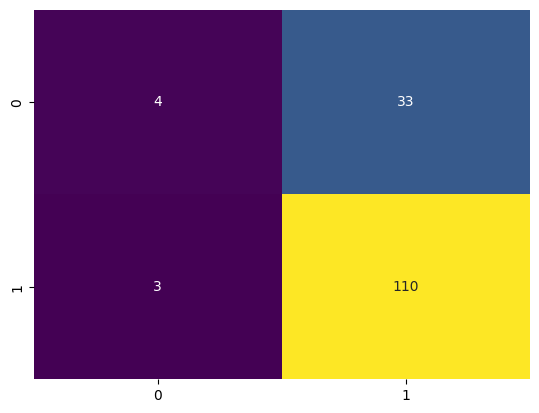

In [8]:
#VISUALIZE confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [10]:
print(f"precesion: {precision_score(y_test,ypred)}")
print(f"recall: {recall_score(y_test, ypred)}")
print(f"f1: {f1_score(y_test,ypred)}")

precesion: 0.7692307692307693
recall: 0.9734513274336283
f1: 0.859375


In [12]:
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.57      0.11      0.18        37
           1       0.77      0.97      0.86       113

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150

